In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

from sklearn.linear_model import Lasso
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

import xgboost as xg
from sklearn.ensemble import RandomForestRegressor

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers
import tensorflow.keras.callbacks
import tensorflow.keras.backend as K

from sklearn.svm import SVR

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df_json = pd.read_json("new_challenge2_dataset.json")

In [3]:
df_json.shape

(105873, 52)

In [4]:
df_json.head(6)

,area,areaCode,item,prod_unit,y0__AgriProd,y0__AnnualFeedProd,y0__AnnualFoodProd,y0__AnnualAgriLosses,y0__GDP,y0__GrossAgriVal,...,y4__Pesticide,y4__Fire,y5__AgriProd,y5__AnnualFeedProd,y5__AnnualFoodProd,y5__AnnualAgriLosses,y5__GDP,y5__GrossAgriVal,y5__Pesticide,y5__Fire
4,Armenia,1,Barley,tonnes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
5,Armenia,1,Barley,tonnes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
6,Armenia,1,Barley,tonnes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
7,Armenia,1,Barley,tonnes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8,Armenia,1,Barley,tonnes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
9,Armenia,1,Barley,tonnes,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [5]:
# Dealing with NAN values
df1 = df_json.fillna(df_json.mean(numeric_only=True))

In [6]:
df1.head(6)

,area,areaCode,item,prod_unit,y0__AgriProd,y0__AnnualFeedProd,y0__AnnualFoodProd,y0__AnnualAgriLosses,y0__GDP,y0__GrossAgriVal,...,y4__Pesticide,y4__Fire,y5__AgriProd,y5__AnnualFeedProd,y5__AnnualFoodProd,y5__AnnualAgriLosses,y5__GDP,y5__GrossAgriVal,y5__Pesticide,y5__Fire
4,Armenia,1,Barley,tonnes,9.327787e+06,73824.897443,316721.935747,33342.986896,834780.380508,7696.25931,...,68230.625504,3.479493e+07,9.981050e+06,79489.473794,331406.171654,35674.323792,0.0,9945.248905,68632.584276,3.465965e+07
5,Armenia,1,Barley,tonnes,9.327787e+06,73824.897443,316721.935747,33342.986896,834780.380508,7696.25931,...,68230.625504,3.479493e+07,9.981050e+06,79489.473794,331406.171654,35674.323792,0.0,9945.248905,68632.584276,3.465965e+07
6,Armenia,1,Barley,tonnes,9.327787e+06,73824.897443,316721.935747,33342.986896,834780.380508,7696.25931,...,68230.625504,3.479493e+07,9.981050e+06,79489.473794,331406.171654,35674.323792,0.0,9945.248905,68632.584276,3.465965e+07
7,Armenia,1,Barley,tonnes,9.327787e+06,73824.897443,316721.935747,33342.986896,834780.380508,7696.25931,...,68230.625504,3.479493e+07,9.981050e+06,79489.473794,331406.171654,35674.323792,0.0,9945.248905,68632.584276,3.465965e+07
8,Armenia,1,Barley,tonnes,9.327787e+06,73824.897443,316721.935747,33342.986896,834780.380508,7696.25931,...,68230.625504,3.479493e+07,9.981050e+06,79489.473794,331406.171654,35674.323792,0.0,9945.248905,68632.584276,3.465965e+07
9,Armenia,1,Barley,tonnes,9.327787e+06,73824.897443,316721.935747,33342.986896,0.000000,7696.25931,...,68230.625504,3.479493e+07,9.981050e+06,79489.473794,331406.171654,35674.323792,0.0,9945.248905,68632.584276,3.465965e+07


In [7]:
ignore_vars = ['y5__AgriProd','area', 'y5__AnnualFeedProd', 'y5__AnnualFoodProd', 'y5__AnnualAgriLosses','y5__GDP', 'y5__GrossAgriVal', 'y5__Pesticide', 'y5__Fire' ]

# Find real and categorical variables
cols = df1.columns
cat_vars = []
real_vars = []

for col in cols:
    
    if not (col in ignore_vars):
        if df1.dtypes[col]  == 'object':
            cat_vars.append(col)
        else:
            real_vars.append(col)
                
print('Categorical variables = ' + str(cat_vars))
print('')
print('Real variables = ' + str(real_vars))

Categorical variables = ['item', 'prod_unit']

Real variables = ['areaCode', 'y0__AgriProd', 'y0__AnnualFeedProd', 'y0__AnnualFoodProd', 'y0__AnnualAgriLosses', 'y0__GDP', 'y0__GrossAgriVal', 'y0__Pesticide', 'y0__Fire', 'y1__AgriProd', 'y1__AnnualFeedProd', 'y1__AnnualFoodProd', 'y1__AnnualAgriLosses', 'y1__GDP', 'y1__GrossAgriVal', 'y1__Pesticide', 'y1__Fire', 'y2__AgriProd', 'y2__AnnualFeedProd', 'y2__AnnualFoodProd', 'y2__AnnualAgriLosses', 'y2__GDP', 'y2__GrossAgriVal', 'y2__Pesticide', 'y2__Fire', 'y3__AgriProd', 'y3__AnnualFeedProd', 'y3__AnnualFoodProd', 'y3__AnnualAgriLosses', 'y3__GDP', 'y3__GrossAgriVal', 'y3__Pesticide', 'y3__Fire', 'y4__AgriProd', 'y4__AnnualFeedProd', 'y4__AnnualFoodProd', 'y4__AnnualAgriLosses', 'y4__GDP', 'y4__GrossAgriVal', 'y4__Pesticide', 'y4__Fire']


In [8]:
df_real = df1[real_vars]
df_cat = df1[cat_vars]

# One-hot encode the categorical variables
df_cat_enc = pd.get_dummies(df_cat, drop_first=True)

In [9]:
df_enc = pd.concat((df_real, df_cat_enc), axis=1)
X = np.array(df_enc)
print(X.shape)

xnames = df_enc.columns

(105873, 53)


In [10]:
y = np.array(df1['y5__AgriProd'])

In [11]:
# splitting data into test and train
Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3)

In [12]:
# Creating scaler objects
xscal = StandardScaler()
yscal = StandardScaler()

# Fit and transform  training data
Xtr1 = xscal.fit_transform(Xtr)
ytr1 = yscal.fit_transform(ytr[:,None])

# Transform  test data
Xts1 = xscal.transform(Xts)
yts1 = yscal.transform(yts[:,None])

# Linear Regression

In [13]:
# Linear Regression
reg = LinearRegression()
reg.fit(Xtr1, ytr1)

# Training 
yhat_tr = reg.predict(Xtr1)
rsq_tr = r2_score(yhat_tr, ytr1)
print('Training R^2 = %12.4e' % rsq_tr)

# Test
yhat_ts = reg.predict(Xts1)
rsq_ts = r2_score(yts1, yhat_ts)
print('Test R^2     = %12.4e' % rsq_ts)

Training R^2 =   9.9693e-01
Test R^2     =   9.9688e-01


# Ridge Regression

In [14]:
reg = Ridge(alpha=1e-5)
reg.fit(Xtr1, ytr1)
yhat1 = reg.predict(Xts1)
rsq = r2_score(yts1, yhat1)
print('Test R^2     = %f' % rsq)

Test R^2     = 0.996882


# Lasso Regression

In [15]:
simplefilter("ignore", category=ConvergenceWarning)

# Select alpha
alpha = 3e-3

# Create Lasso object and fit on training data
reg = Lasso(alpha=alpha)
reg.fit(Xtr1, ytr1)

# Predict and score on test
yhat = reg.predict(Xts1)
rsq = r2_score(yts1, yhat)

print('Test R^2= %f' % rsq)

Test R^2= 0.996714


# Neural Network

In [16]:

nin = Xtr.shape[1]  # dimension of input data
nh = 256   # number of hidden units
nout = 1  
model = Sequential()
model.add(Dense(units=nh, input_shape=(nin,),kernel_initializer='normal',activation='relu', name='hidden'))
model.add(Dense(units=20,kernel_initializer='normal' ,activation='tanh'))
model.add(Dense(units=1,kernel_initializer='normal' ,name='output', activation ='linear'))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 256)               13824     
                                                                 
 dense (Dense)               (None, 20)                5140      
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 18,985
Trainable params: 18,985
Non-trainable params: 0
_________________________________________________________________


In [18]:
opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='mean_squared_error'
             )

In [19]:
hist = model.fit(Xtr1, ytr1, epochs=10, batch_size=100, validation_data=(Xts1,yts1))

Epoch 1/10
742/742 [==============================] - 7s 6ms/step - loss: 0.4736 - val_loss: 0.3544
Epoch 2/10
742/742 [==============================] - 3s 5ms/step - loss: 0.2468 - val_loss: 0.2394
Epoch 3/10
742/742 [==============================] - 3s 5ms/step - loss: 0.1691 - val_loss: 0.1964
Epoch 4/10
742/742 [==============================] - 3s 4ms/step - loss: 0.1449 - val_loss: 0.1777
Epoch 5/10
742/742 [==============================] - 3s 4ms/step - loss: 0.1266 - val_loss: 0.1602
Epoch 6/10
742/742 [==============================] - 3s 4ms/step - loss: 0.1193 - val_loss: 0.2159
Epoch 7/10
742/742 [==============================] - 4s 5ms/step - loss: 0.1229 - val_loss: 0.1276
Epoch 8/10
742/742 [==============================] - 3s 5ms/step - loss: 0.0996 - val_loss: 0.1313
Epoch 9/10
742/742 [==============================] - 3s 5ms/step - loss: 0.0876 - val_loss: 0.1179
Epoch 10/10
742/742 [==============================] - 3s 5ms/step - loss: 0.0793 - val_loss: 0.1043

Text(0, 0.5, 'loss')

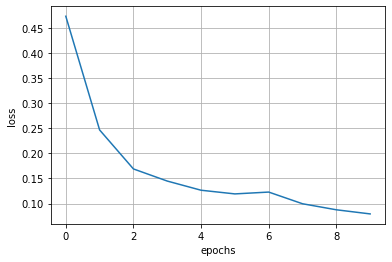

In [20]:
tr_accuracy = hist.history['loss']


plt.plot(tr_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')


# Random Forest Regressor

In [30]:
model = RandomForestRegressor()
model.fit(Xtr1,ytr1.ravel())

# Get the mean absolute error on the validation data
yhat = model.predict(Xts1)
r2 = r2_score(yts1, yhat)
print('Random forest r2 score = ', r2)

Random forest r2 score =  0.997457679842182


# XG Boost

In [32]:
XGBModel = xg.XGBRegressor()
XGBModel.fit(Xtr1,ytr1 , verbose=False)

# Get the mean absolute error on the validation data :
yhat = XGBModel.predict(Xts1)
r2 = r2_score(yts1 , yhat)
print('XGBoost  r2_Score = ',r2)

XGBoost  r2_Score =  0.9968221312121717


# SVR

In [23]:
regressor = SVR(kernel = 'rbf')
regressor.fit(Xtr1, ytr1.ravel())
yhat = regressor.predict(Xts1)

rsq_ts = r2_score(yts1, yhat)
print('Test R^2     = %12.4e' % rsq_ts)

Test R^2     =   5.9892e-01


# Ablation

In [24]:
ignore_vars = ['y5__AgriProd','area','areaCode' ,'y5__AnnualFeedProd', 'y5__AnnualFoodProd', 'y5__AnnualAgriLosses','y5__GDP', 'y5__GrossAgriVal', 'y5__Pesticide', 'y5__Fire' ]

# Find real and categorical variables
cols = df1.columns
cat_vars = []
real_vars = []

for col in cols:
    
    if not (col in ignore_vars):
        if df1.dtypes[col]  == 'object':
            cat_vars.append(col)
        else:
            real_vars.append(col)
                
print('Categorical variables = ' + str(cat_vars))
print('')
print('Real variables = ' + str(real_vars))

df_real = df1[real_vars]
df_cat = df1[cat_vars]

# One-hot encode the categorical variables
df_cat_enc = pd.get_dummies(df_cat, drop_first=True)
                            

df_enc = pd.concat((df_real, df_cat_enc), axis=1)
X = np.array(df_enc)

y = np.array(df1['y5__AgriProd'])


Categorical variables = ['item', 'prod_unit']

Real variables = ['y0__AgriProd', 'y0__AnnualFeedProd', 'y0__AnnualFoodProd', 'y0__AnnualAgriLosses', 'y0__GDP', 'y0__GrossAgriVal', 'y0__Pesticide', 'y0__Fire', 'y1__AgriProd', 'y1__AnnualFeedProd', 'y1__AnnualFoodProd', 'y1__AnnualAgriLosses', 'y1__GDP', 'y1__GrossAgriVal', 'y1__Pesticide', 'y1__Fire', 'y2__AgriProd', 'y2__AnnualFeedProd', 'y2__AnnualFoodProd', 'y2__AnnualAgriLosses', 'y2__GDP', 'y2__GrossAgriVal', 'y2__Pesticide', 'y2__Fire', 'y3__AgriProd', 'y3__AnnualFeedProd', 'y3__AnnualFoodProd', 'y3__AnnualAgriLosses', 'y3__GDP', 'y3__GrossAgriVal', 'y3__Pesticide', 'y3__Fire', 'y4__AgriProd', 'y4__AnnualFeedProd', 'y4__AnnualFoodProd', 'y4__AnnualAgriLosses', 'y4__GDP', 'y4__GrossAgriVal', 'y4__Pesticide', 'y4__Fire']


In [25]:
Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3)


In [26]:
# Create the scaler objects
xscal = StandardScaler()
yscal = StandardScaler()

# Fit and transform the training data
Xtr1 = xscal.fit_transform(Xtr)
ytr1 = yscal.fit_transform(ytr[:,None])

# Transform the test data
Xts1 = xscal.transform(Xts)
yts1 = yscal.transform(yts[:,None])

# Linear Regression with Ablation

In [27]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

# Fit
reg_ls = LinearRegression()
reg_ls.fit(Xtr1, ytr1)

# Training R^2
yhat1_tr = reg_ls.predict(Xtr1)
rsq_tr = r2_score(yhat1_tr, ytr1)
print('Training R^2 = %12.4e' % rsq_tr)

# Test R^2
yhat1_ts = reg_ls.predict(Xts1)
rsq_ts = r2_score(yts1, yhat1_ts)
print('Test R^2     = %12.4e' % rsq_ts)

Training R^2 =   9.9669e-01
Test R^2     =   9.9732e-01


# Ridge Regression with Ablation

In [28]:
reg_ls = Ridge(alpha=1e-5)
reg_ls.fit(Xtr1, ytr1)
yhat1 = reg_ls.predict(Xts1)
rsq = r2_score(yts1, yhat1)
print('Test R^2     = %f' % rsq)

Test R^2     = 0.997325


# Xg boost with Ablation

In [31]:
XGBModel = xg.XGBRegressor()
XGBModel.fit(Xtr1,ytr1 , verbose=False)

# Get the mean absolute error on the validation data :
yhat = XGBModel.predict(Xts1)
r2 = r2_score(yts1 , yhat)
print('XGBoost  r2_score = ',r2)

XGBoost  r2_score =  0.9968221312121717
